In [1]:
import pandas as pd
import matplotlib.pyplot as matplt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from datetime import datetime

In [62]:
# Converts text to CSV
def txt_to_csv(fileName, sortBy = None):
    separator = '|'
    dataFrame = pd.read_csv('data/' + fileName + '.txt', delimiter= separator)
    dataFrame.columns = dataFrame.columns.str.strip()  # strips whitespace from columns
    dataFrame = dataFrame.map(lambda x: x.strip() if isinstance(x, str) else x) # strips whitespace from values
    
    if (sortBy):
        dataFrame.sort_values([sortBy], axis=0, ascending=[True], inplace=True)
    dataFrame.to_csv('data/' + fileName + '.csv', index = None)


txtDataFiles = ['iris-event-list', 'iris-station-list']
for file in txtDataFiles:
    txt_to_csv(fileName= file, sortBy= 'station')

Scatter Plot of peak time vs. peak(dB)


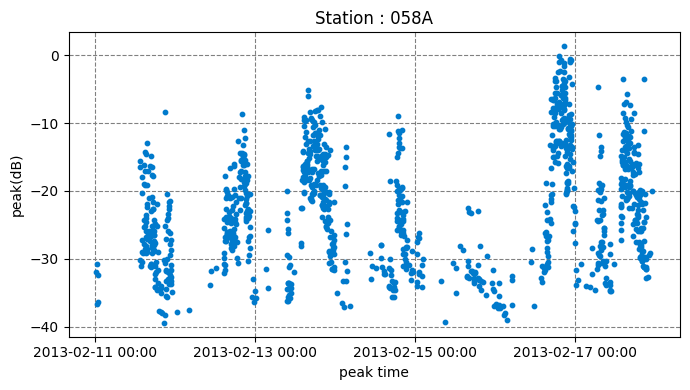

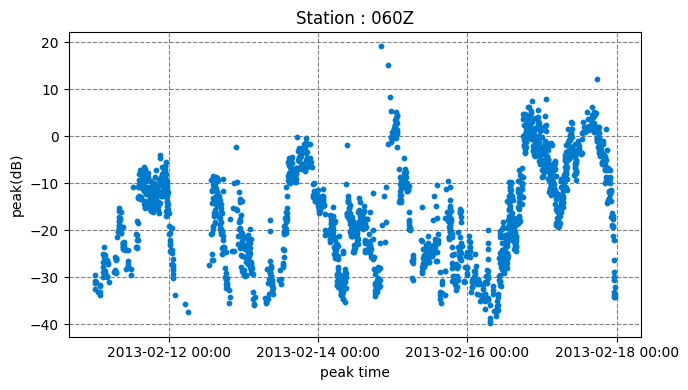

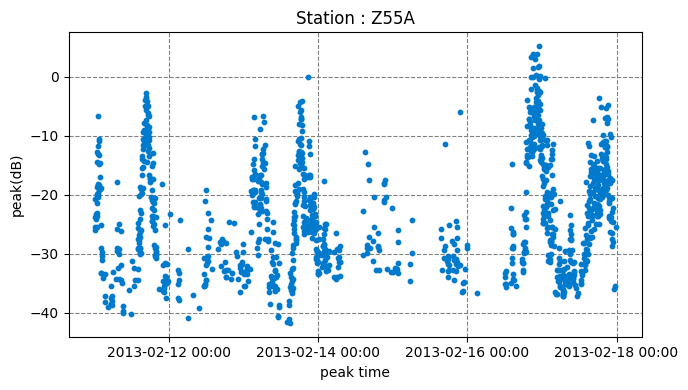

In [63]:
# Generates Scatter Plot
def generateScatterPlot(stations, feature1, feature2):
    
    feature1 = 'peak time'
    feature2 = 'peak(dB)' 
    csvData = pd.read_csv('data/iris-event-list.csv')

    for station in stations:
        # filtering data as per research station 
        data = csvData[csvData['station'] == station]

        # convert string into date time obj
        dates = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in data[feature1]]

        # scatter plot
        matplt.scatter(x=dates, y=data[feature2], c= '#007acc', s= 10)
        ax = matplt.gca()

        # set interval for x axis
        ax.yaxis.set_major_locator(MultipleLocator(10))

        # set interval for y axis
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour= 00))
        ax.xaxis.set_major_locator(mdates.DayLocator(interval= 2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

        # set figure size
        matplt.rcParams["figure.figsize"] = [7, 4]

        # dashed grid 
        ax.set_axisbelow(True)
        ax.grid(color='gray', linestyle='dashed')

        matplt.xlabel(feature1)
        matplt.ylabel(feature2)
        matplt.title('Station : ' + station)

        matplt.show()


stations = ['058A', '060Z', 'Z55A']
column1 = 'peak time'
column2 = 'peak(dB)'
print("Scatter Plot of " + column1 + ' vs. ' + column2)

generateScatterPlot(stations= stations, feature1= column1, feature2= column2)
